#Linear Transformation, Matrix Decomposition and Principal Component Analysis.
This week workshop will have two sections:
*   Section-1: 
    *   Objectives:
         *   In this section we will see the effects of Linear Transformation on Image.
        *   Perform some matrix decomposition with the help of Python and Numpy Library.
    *   Learning outcomes:
      *   Read, Display and Manipulate and Image data with python.
      *   Observe and Experiment with Linear Transformation and its effect on images.

*   Section-2:
  *   Objectives:
      *   In this section we will implement Dimensionality reduction algorithm-PCA on given data set.
      *   Find the Co-variance matrix and its associated eigen values and eigen vectors.
      *   Project the data in higher dimension to lower dimension with maximum variance.
  *   Learning Outcomes:
      *   Read,Create and Explain a Co-variance matrix.
      *   Find the principal components of co-variance matrix.
      *   Project your original data to principal componenents(Reducing the Dimensions).











# **Section-1: Image manipulation and Linear Transformation.**
---


## **Read an Image.**
---
We will use Pillow(PIL) Library to read an image store the image as Numpy array--ndarray. This will help us to perform various image processing fucntions on the image.
In this section you will understand:
  *   How to read image file as Numpy array ndarray.
  *   How to save Numpy array ndarray as image file.





Pixel type: uint8
Number of dimensions: 3
Image size: (256, 256, 3)


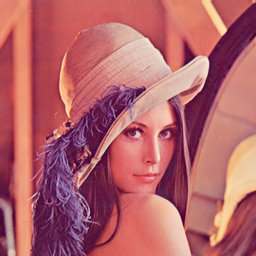

In [3]:
from PIL import Image
import numpy as np
img = Image.open("/content/Lena.png")
im = np.array(img) # stores the image in Numpy array.
print('Pixel type:', im.dtype) 
print('Number of dimensions:', im.ndim) #[Dimension-1 for Gray Scale image, Dimension-3 for RGB image]
print('Image size:', im.shape)

img

### **Questions-1:**
---
*   Convert the above image to grayscale and store in the name "imgGray"(Hint: check img.convert() function of Pillow library.
*   Store the "imgGray" into numpyarray.
*   Check the shape with above.
*   Save the numpyarray into Image.(Hint: check for Pil.fromarray() & PIL.save()
*   Display "imgGray".



(256, 256)


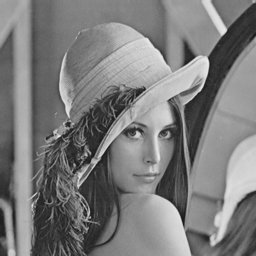

In [9]:
#Your Code Here


### **Questions-2:**
---
*   Create an array of all zeros with the dimension[(256, 256)] and store in the variable "square".[Hint:np.zeros()]
*   Index the value square[50:100, 50:100] = 255.
*   Store the new array in image.
*   Convert the image to grayscale.
*   Display the image.


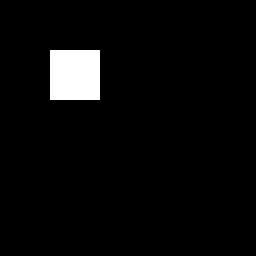

In [17]:
#Your Code Here


## **Seperating RGB Channel of Coloured image.**
---
As explained the pixel values of any Image ranges from[0-255]. An coloured image is three dimesional matrix, where each dimension represents the particular colour channel i.e. Red Channel, Blue Channel and Green Channel.

In this section you will understand:
  *   Decompose a colour image into three different channel.
  *   Concatenate the different channel.

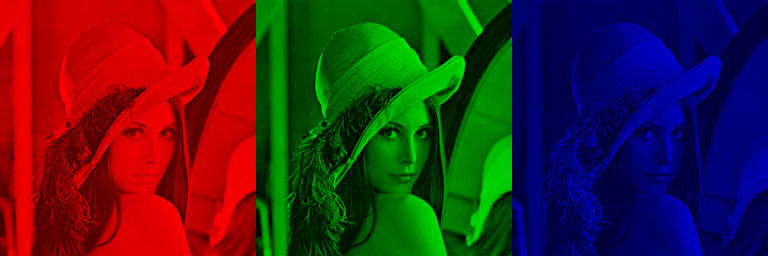

In [27]:
im = np.array(Image.open('Lena.png'))
im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0
im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
# im_RGB = np.hstack((im_R, im_G, im_B))
# im_RGB = np.c_['1', im_R, im_G, im_B]
Image.fromarray(im_RGB)
#im_R.shape

### **Questions-1:**
---
*   Create three array of all zeros with the dimension[(600, 600)] and store in the variable red, blue and green.[Hint:np.zeros()]
*   Perform following operations:

        red[150:350, 150:350] = 255; green[200:400, 200:400] = 255, blue[250:450, 250:450] = 255
*   Store each array into Image and convert them to grayscale.
*   Merge all three image.[Hint: Use Image.merge()]
*   Display the image.
*   Rotate the image by 45 and 90 Degree.[Hint: Use Image.rotate() function]





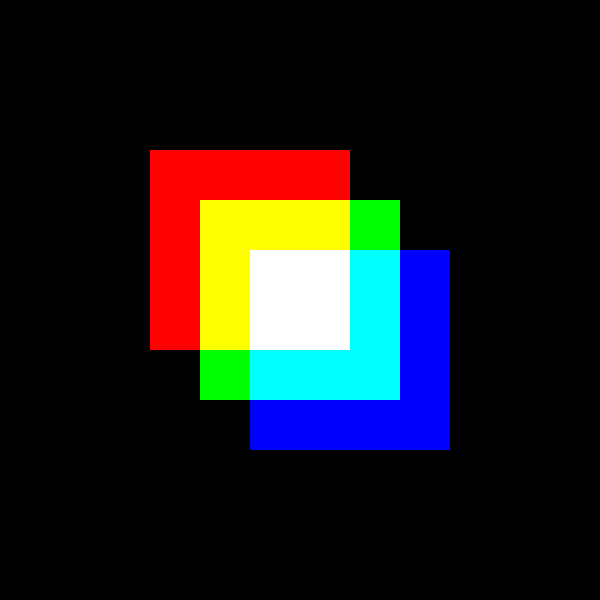

In [35]:
#Your Code Here



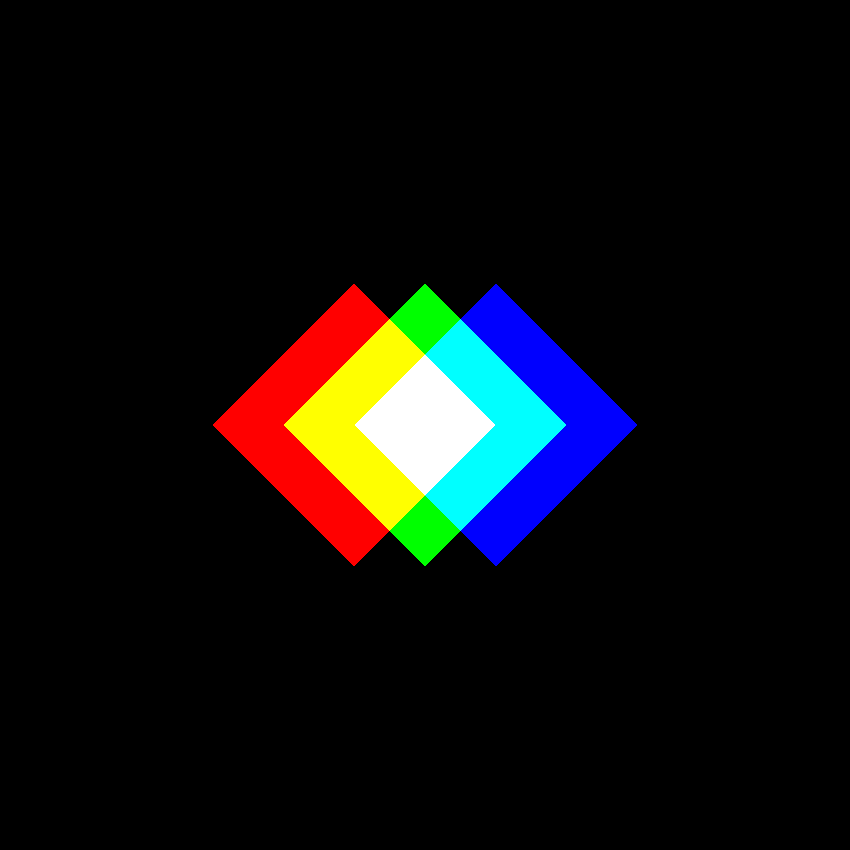

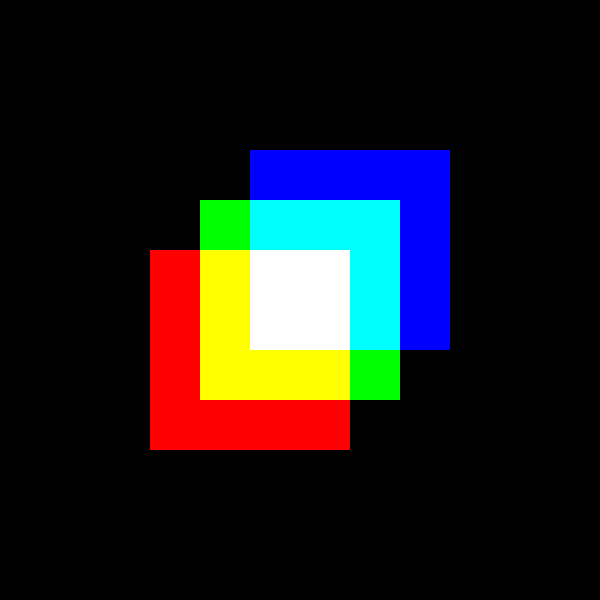

# **Section-2: Reducing the Dimension with PCA**
---
Steps in PCA:

Step: 0 Prepare the data

Step:1 Standardize the data

Step:2 Compute the covariance matrix of data

Step:3 Compute the Eigen Vectors and Eigen Values 

Step: 4 Identify the reduced feature vector

Step:5 Recast the data


##**Step-0: Prepare the data**
---
Tasks:
Define the path of dataset.

Load and observe the dataset with pandas.

Check the information of all the coloumn.

Find the shape of data.

Drop the last coloumn of the dataset and recheck the shape of the dataset.


In [38]:
#Your Code here
#path = 

In [41]:
import pandas as pd
dataset = pd.read_csv(path)
dataset.info()
print("*************************************************************")
print("The shape of dtaset is:  ", dataset.shape)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
# Drop last column of a dataframe(Write code X=?)
#x = 
print("The shape of feature matrix is:  ", x.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

##**Step-1: Prepare Standarize the Data.**
---
To assure all the inital variables are transformed to same scale, it is a most to perform scaling operation before any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following expression:
\begin{align}
\mathbf{X_{std}}= \mathbf{X} - \mathbf{X_{mean}} / Standard Deviation(X)
\
\end{align}

Hint: 

For this task we will use Standardscaler function from sklearn library.

Tasks:

Standardize the dataset using above mentioned library.

In [42]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)
X_std.shape

(569, 30)

##**Step-2: Compute the covarince matrix of data.**
---
Each element of the covarince matrix represents covariance between each $ij^{th} element. $ The covarince between two elements is calculated as follows:

\begin{align}
        σ{_{jk}} = 1/(n-1) {\sum_{i=1}^{n} (x_{jk} - \bar x ) ( x_{jk} - \bar x_k) }
\end{align}

Matrix representation of the above equation looks like:

\begin{align}
        \sum = 1/n-1 ((X - \bar x)^T (X - \bar x))
\end{align}


Here $\bar x$  is the mean vector $\bar x = 1/n \sum_{i=1} ^ {n} {x_i} $

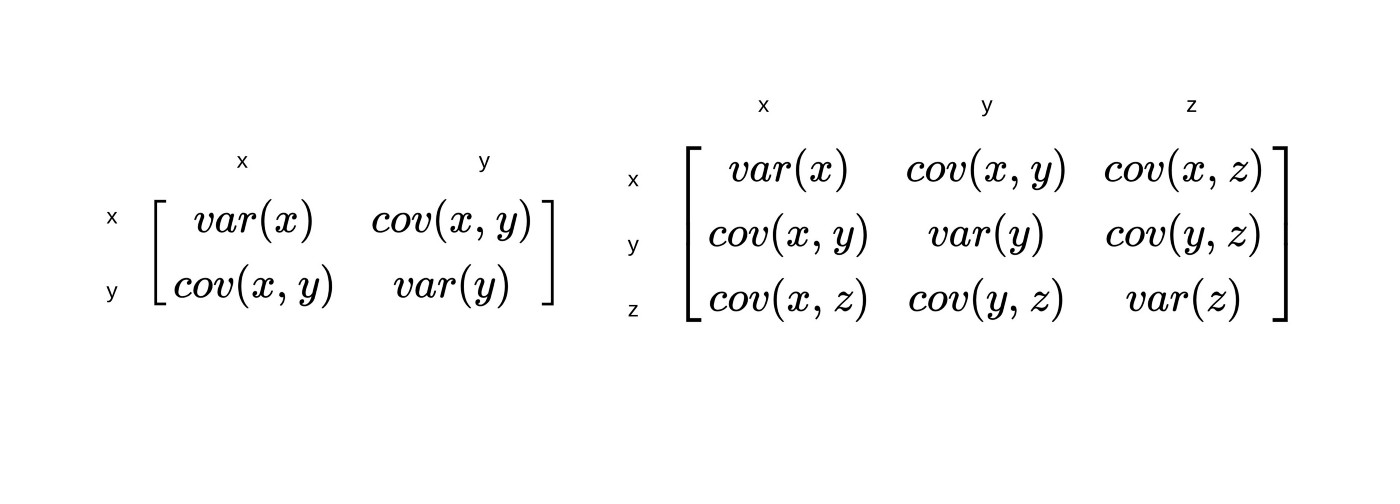

In [43]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.1

##**Step-2.1: Visualize  the covarince matrix of data.**
---
Hint:

Visualize the covariance matrix using sns.heatmap function.



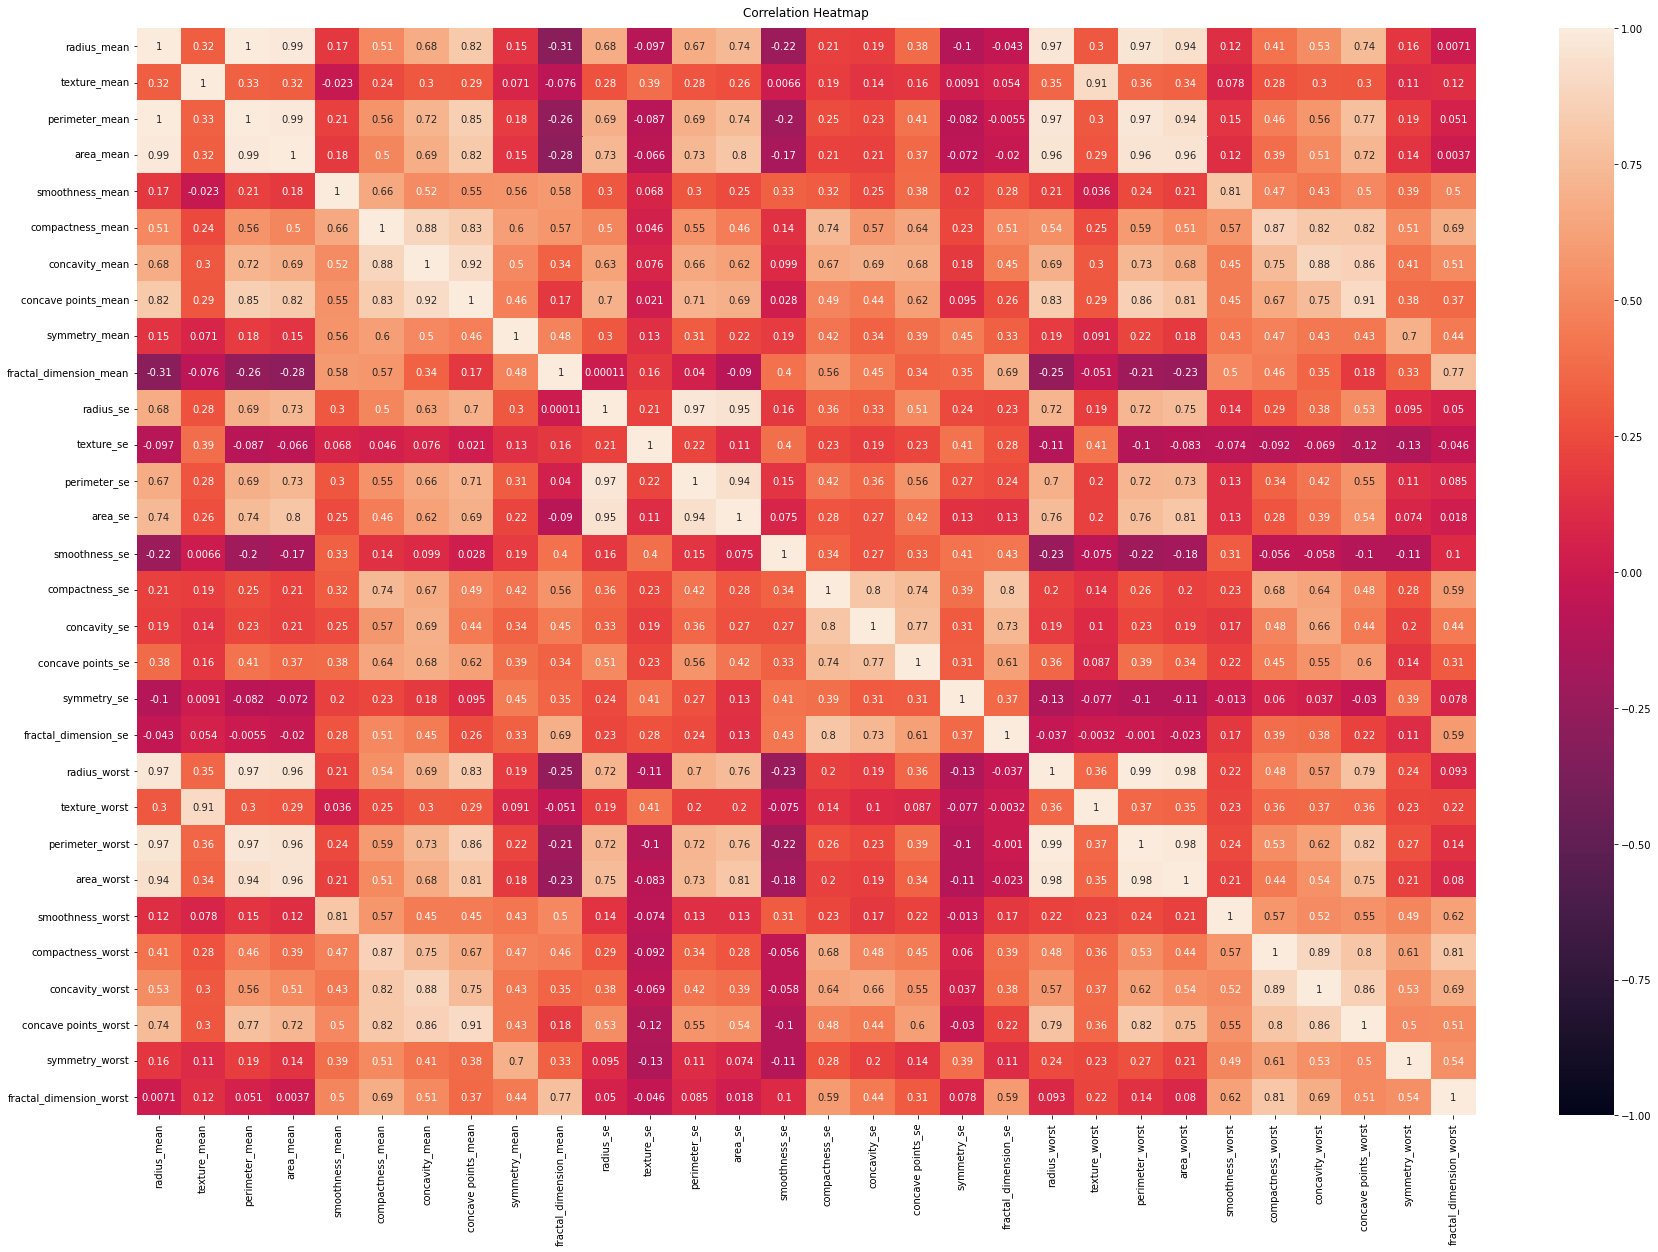

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns
# Increase the size of the heatmap.
plt.figure(figsize=(30, 20))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(x.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

##**Step-3: Find Eigen Values and Vector of Covariance Matrix**
---

This step is also called as Eigen Decomposition. In this step we will find the eigen values and eigen vectors of the covariance matrix. We will do this with the help of "linalg" library of numpy.

Once we find the eigen vectors and eigen values we will sort them from highest to lowest order. 


Hint:

You may use numpy.cov to find covariance matrix of data. & numpy.linalg.eig() function to find its eigen vectors.



In [50]:
# Your Code Here
#cov_mat = 
#eig_vals, eig_vecs = 
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -5.97060883e-02  6.45499033e-02 -6.03050001e-01
   4.94688505e-02 -3.21788366e-02 -1.13995382e-02 -1.30674825e-01
   1.12699390e-01  2.40934066e-01 -3.02243402e-01  2.54896423e-01
   2.03461333e-01  2.15600995e-02  1.07922421e-01 -1.57841960e-01
  -3.87061187e-02 -4.11029851e-02 -2.97886446e-02 -2.73661018e-04
  -1.05339342e-02  6.58114593e-05 -1.73573093e-02  2.45566636e-02
  -8.47459309e-02  9.87867898e-02  5.54997454e-04 -9.48006326e-02
  -2.44134993e-01 -4.483694

In [51]:
# Sanity Check: magnitude(length of all the eigen vector must be 1 i.e. eigen vectors is a unit vector.)
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


### 

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes.

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top $k$ eigenvectors.


In [52]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
13.304990794374557
5.701374603726145
2.8229101550062277
1.9841275177301998
1.6516332423301214
1.2094822398029748
0.676408881700907
0.4774562546895082
0.41762878210781734
0.3513108748817337
0.2944331534911641
0.2616211613661208
0.24178242132831354
0.15728614921759346
0.09430069560105576
0.08000340447737686
0.059503613530431834
0.05271142221014788
0.04956470021298141
0.031214260553066506
0.03002566309042833
0.027487711338904132
0.024383691354591244
0.018086793984305273
0.015508527134418882
0.008192037117607
0.0069126125791843995
0.0015921360011976334
0.0007501214127191807
0.0001332790566637439


##**Step-3: Identify the Principal Components.**
---

After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called $\color{Red}{"explained-variance"}$ which can be calculated from the eigenvalues. 

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [53]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [62]:
var_exp

[44.272025607526345,
 18.971182044033096,
 9.393163257431382,
 6.602134915470141,
 5.495768492346272,
 4.02452203988336,
 2.2507337129825133,
 1.5887238000213275,
 1.3896493745591105,
 1.1689781894131497,
 0.9797189875980151,
 0.8705379007378826,
 0.8045249871967314,
 0.5233657454926366,
 0.3137832167627396,
 0.26620933651523165,
 0.1979967925324269,
 0.1753959450226361,
 0.16492530592251572,
 0.10386467483387093,
 0.0999096463700251,
 0.09146467510543377,
 0.08113612588991109,
 0.06018335666716692,
 0.05160423791651976,
 0.02725879954774912,
 0.023001546250596003,
 0.005297792903809347,
 0.002496010324689482,
 0.000443482742735832]

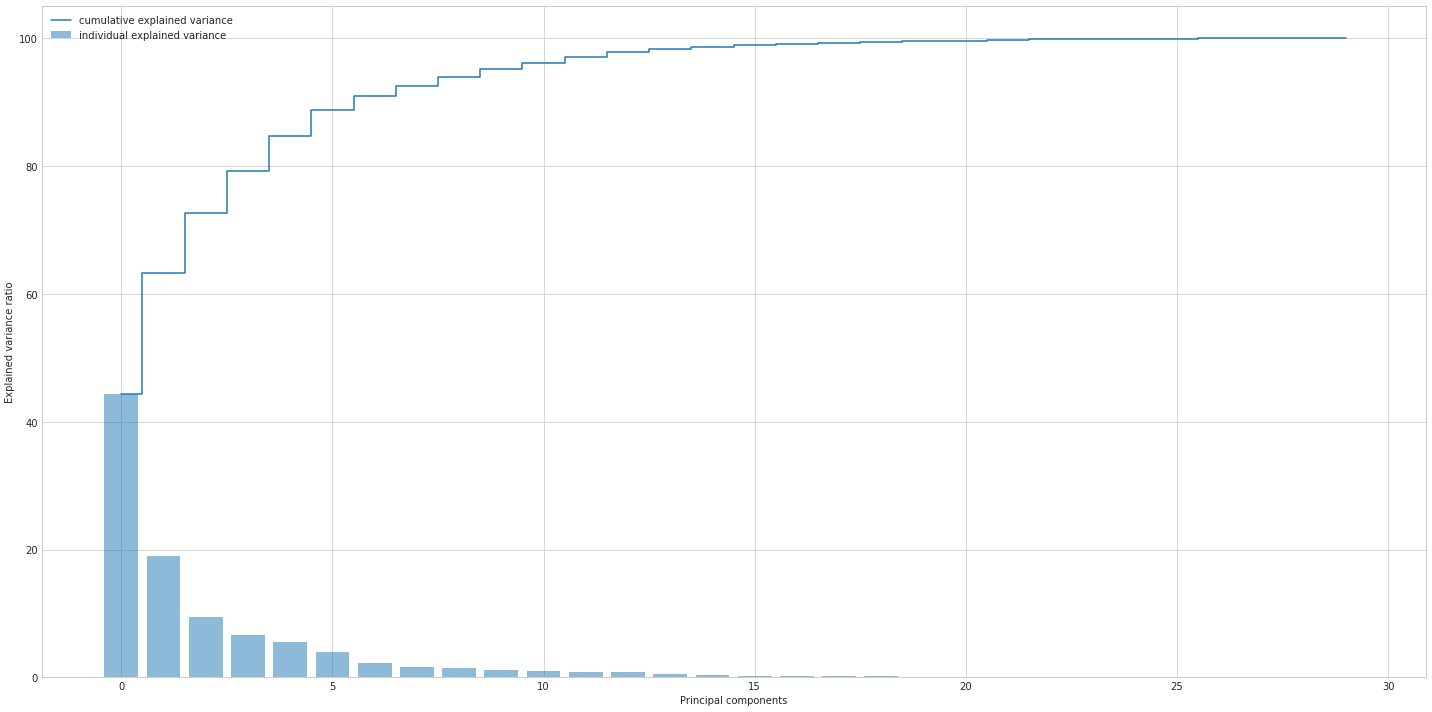

In [61]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 10))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('pca2.pdf')

The plot above clearly shows that most of the variance (44.27% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (19%) as we mover further ahead the information they bear keepd gradually decreasing.
Now the task is to determine how many principal components we select based on how much variance I want to protect in my new reduced dimension space.


##**Step-5: Recast the data into new found reduced feature space.**
---
Now we need to construct a Projection Matrix that will recast the data into new found feature subspace. 
This Projection Matrix is constructed by concatenating(stacking) using top $k$ eigenvectors depending how much information we want to preserve.

For this task we will use top 8 eigen vectors.


In [64]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1),
                      eig_pairs[3][1].reshape(30,1),
                      eig_pairs[4][1].reshape(30,1),
                      eig_pairs[5][1].reshape(30,1),
                      eig_pairs[6][1].reshape(30,1),
                      eig_pairs[7][1].reshape(30,1),))

print('Matrix W:\n', matrix_w.shape)

Matrix W:
 (30, 8)


In [65]:
Y = X_std.dot(matrix_w)

In [66]:
Y.shape

(569, 8)

# **Conclusion: Dimension Reduction with PCA.**
---
We started with dimension(568,30) and Reduce our dimension to (568,8).

